# Time Series EDA

- Time Series Train-Test Split
    1. Human-based
    1. Percentage Based
    1. Cross Validate Splits
- 10 Weird Time Series Visualizations to Impress Your Friends and Family (Doctors Hate Her)
    1. Blow off the time series
    1. y over time
    1. y averaged over various periods over time
    1. change in y over time
    1. Seasonal Plot
    1. Seasonal Subseries Plot
    1. Lag Plot
    1. Autocorrelation Plot
    1. Seasonal Decomposition
    1. Area Plots
- Aside: working with dates in matplotlib
- Aside: `strftime`

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# plotting defaults
plt.rc('figure', figsize=(11, 5))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

url = 'https://gist.githubusercontent.com/ryanorsinger/0ec766c66f4089bdcbc1d4fb294a3394/raw/197c1f0d7b55a45f29437811bc73d9c4ef8af647/sa_temps.csv'
df = pd.read_csv(url, index_col='datetime', parse_dates=True).sort_index()
# converting the units of the data we are ingesting
df.temp = (df.temp - 273.15) * 1.8 + 32

print('Date Range:', df.index.min(), 'to', df.index.max())
df.head()

df.shape[0]

Date Range: 2012-10-01 13:00:00 to 2017-11-30 00:00:00


45252

In [2]:
df.head()

,temp
datetime,
2012-10-01 13:00:00,61.052000
2012-10-01 14:00:00,61.076568
2012-10-01 15:00:00,61.139294
2012-10-01 16:00:00,61.202020
2012-10-01 17:00:00,61.264747


In [3]:
df.size, df.shape

(45252, (45252, 1))

In [4]:
df.tail(2)

,temp
datetime,
2017-11-29 23:00:00,71.834
2017-11-30 00:00:00,65.966


In [3]:
df.temp.describe()

count    45252.000000
mean        69.144163
std         14.946638
min         17.420000
25%         59.810000
50%         71.661650
75%         79.412000
max        104.918000
Name: temp, dtype: float64

- **seasonality**: a repeated cycle in the data. Occurs at a fixed frequency. In our weather data there is yearly and daily seasonality
- **trend**: long term upwards or downwards movement
- **cycle**: Some arbitrary chunk of time, usually longer than a season, or consists of multiple seasons

## Train-Test Split

- Ideally all splits contain a season
- Human-based: use the last year as test
- Percentage based: use the last 20% as test
- Cross Validate: break data up into slices and use successive slices as train and test repeatedly (`sklearn.model_selection.TimeSeriesSplit`)
    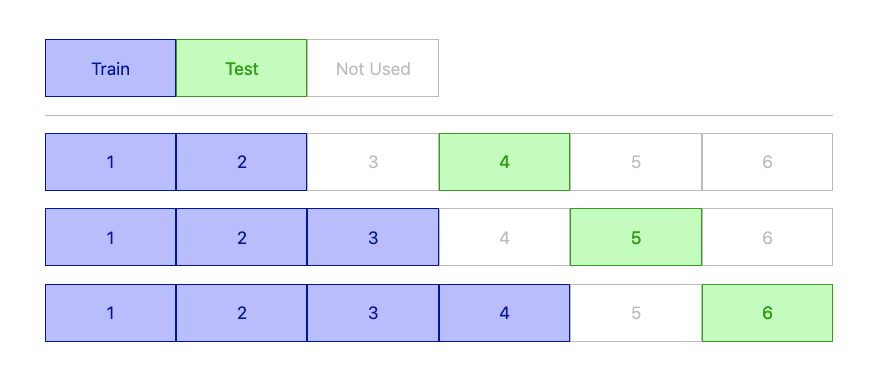

In [4]:
# set wanted train size
train_size = 0.7

In [12]:
# settins train index cutoff
train_index = int(round(train_size * df.shape[0], 0))

In [14]:
# creating test and train
train = df.reset_index()[:train_index]
test = df.reset_index()[train_index:]

In [18]:
# check it out
train.tail(1)

,datetime,temp
31675,2016-05-13 08:00:00,73.886


In [19]:
# check it out
test.head(1)

,datetime,temp
31676,2016-05-13 09:00:00,73.112


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from prepare import prepare_items, prepare_opsd

In [6]:
# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)


# Part 1: items explore

In [3]:
# get data
df = prepare_items()

In [5]:
# checking
df.head()

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state,month_name,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,Tuesday,10.92
2013-01-01,3,17,88313590791,88313590791,Ducal,Ducal Refried Red Beans,1.16,295813,26,2118 Fredericksburg Rdj,78201,San Antonio,TX,January,Tuesday,30.16
2013-01-01,10,7,70177154004,70177154004,Twinings Of London,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,125995,32,8503 NW Military Hwy,78231,San Antonio,TX,January,Tuesday,308.48
2013-01-01,3,18,21200725340,21200725340,Scotch,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,314073,45,2118 Fredericksburg Rdj,78201,San Antonio,TX,January,Tuesday,197.55
2013-01-01,3,19,41520035646,41520035646,Careone,Careone Family Comb Set - 8 Ct,0.74,332333,34,2118 Fredericksburg Rdj,78201,San Antonio,TX,January,Tuesday,25.16


### Split the data
#### Percentage-based

In [9]:
# setting percentage based index
train_size = .70
n = df.shape[0]
test_start_index  = round(train_size * n)
test_start_index, df.shape[0]

(639100, 913000)

In [10]:
# everything up not, not including, to the test_start_index
train = df[:test_start_index] 
# everythong after, including, the test_start_index
test = df[test_start_index:]

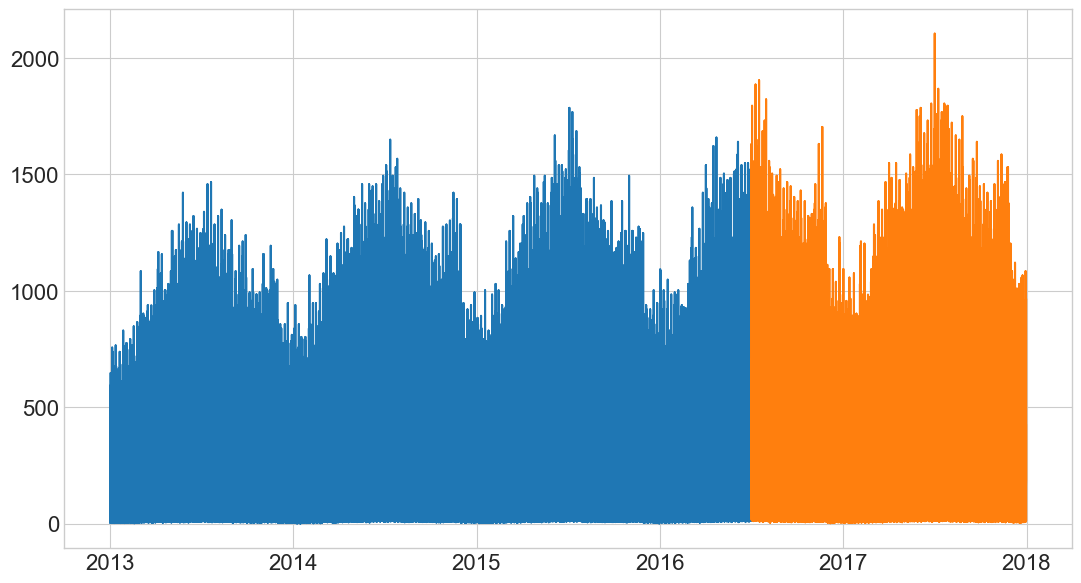

In [13]:
# plot to see the results
plt.plot(train.index, train.sales_total)
plt.plot(test.index, test.sales_total)

#### Human-based

In [17]:
# chgecking the diff years in the dataset
df.index.year.value_counts().sort_index() # will take 2017 as the cut ogg

2013    182500
2014    182500
2015    182500
2016    183000
2017    182500
Name: sale_date, dtype: int64

In [26]:
# includes 2016
train2 = df[:'2016']
test2 = df['2017':]

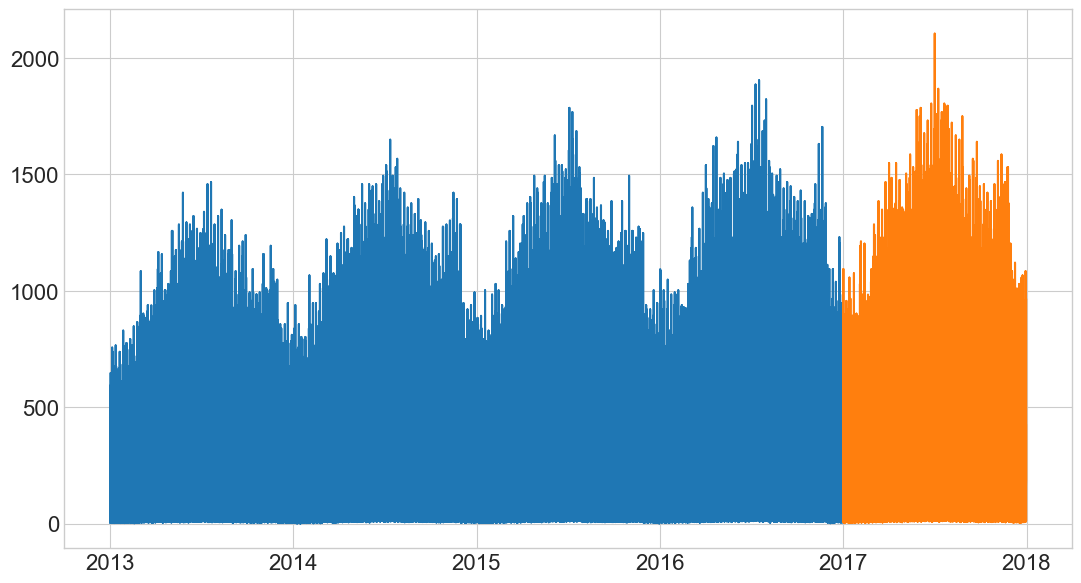

In [31]:
plt.plot(train2.index, train2.sales_total)
plt.plot(test2.index, test2.sales_total)

In [32]:
# set the y
y = train.sales_total
y.head()

sale_date
2013-01-01     10.92
2013-01-01     30.16
2013-01-01    308.48
2013-01-01    197.55
2013-01-01     25.16
Name: sales_total, dtype: float64

<AxesSubplot:ylabel='Frequency'>

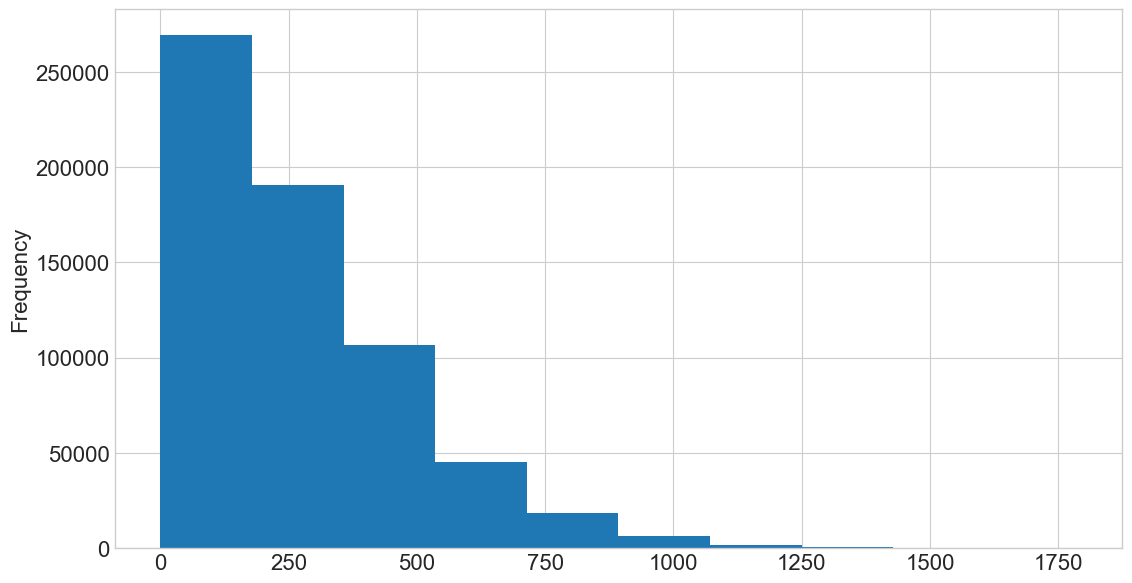

In [34]:
# observiing the dist of our target
y.plot.hist()

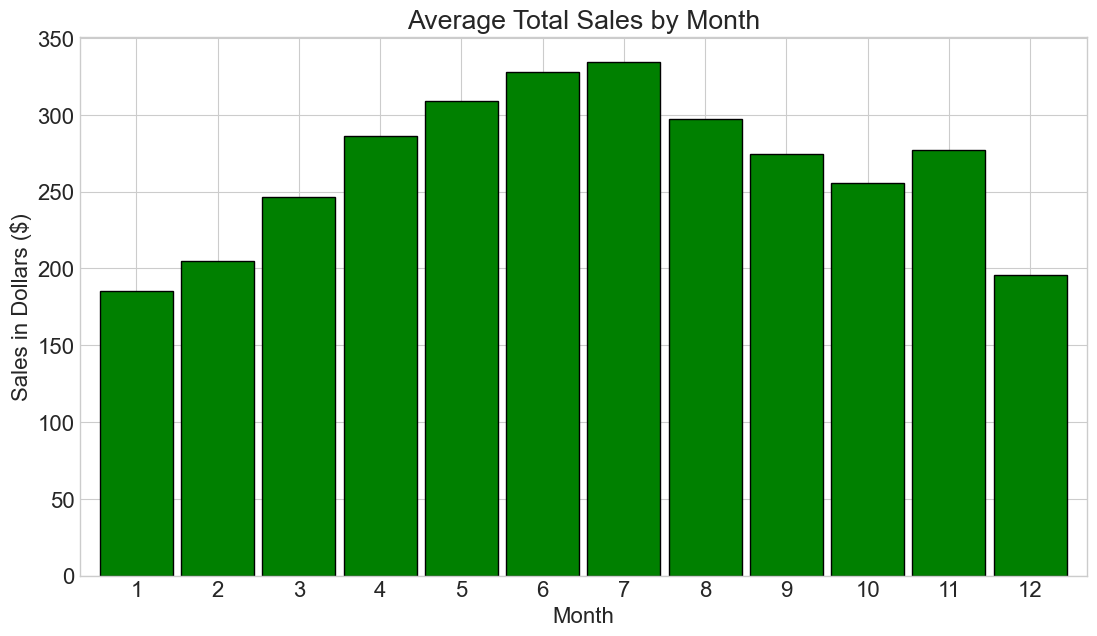

In [39]:
# examining by month
ax = y.groupby(y.index.month).mean().plot.bar(color = 'g', width=.9, ec = 'black')
plt.xticks(rotation=0)
ax.set(title='Average Total Sales by Month', xlabel='Month', ylabel='Sales in Dollars ($)')
plt.show()

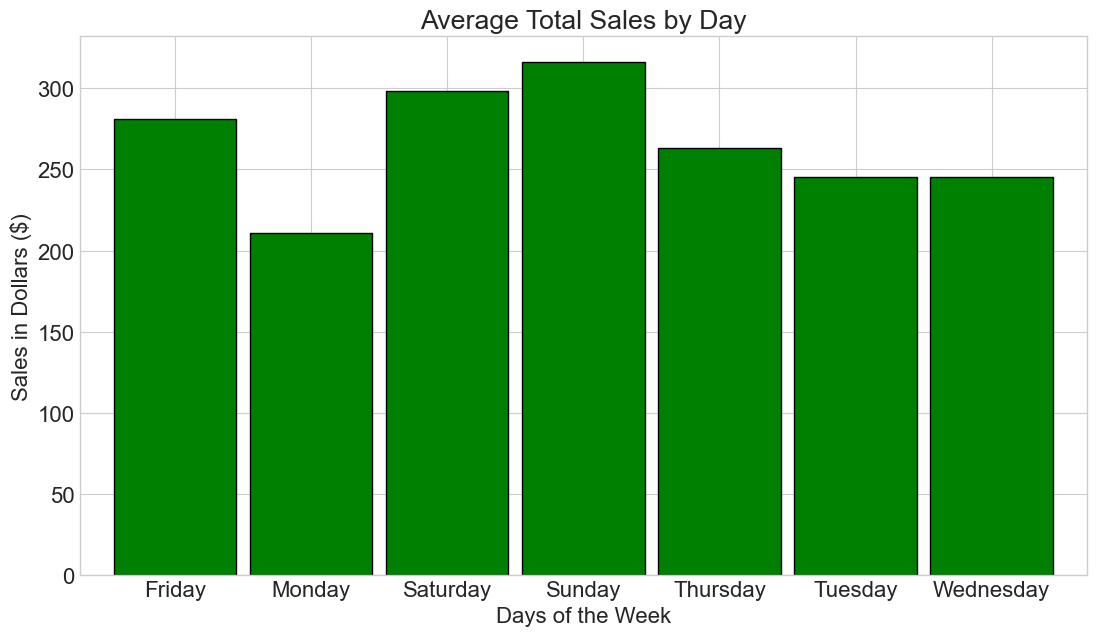

In [42]:
# examining by day
ax = y.groupby(y.index.day_name()).mean().plot.bar(color = 'g', width=.9, ec = 'black')
plt.xticks(rotation=0)
ax.set(title='Average Total Sales by Day', xlabel='Days of the Week', ylabel='Sales in Dollars ($)')
plt.show()

In [47]:
# sns.boxplot(data=train, x=)

#### Visualize the target over time

<AxesSubplot:xlabel='sale_date'>

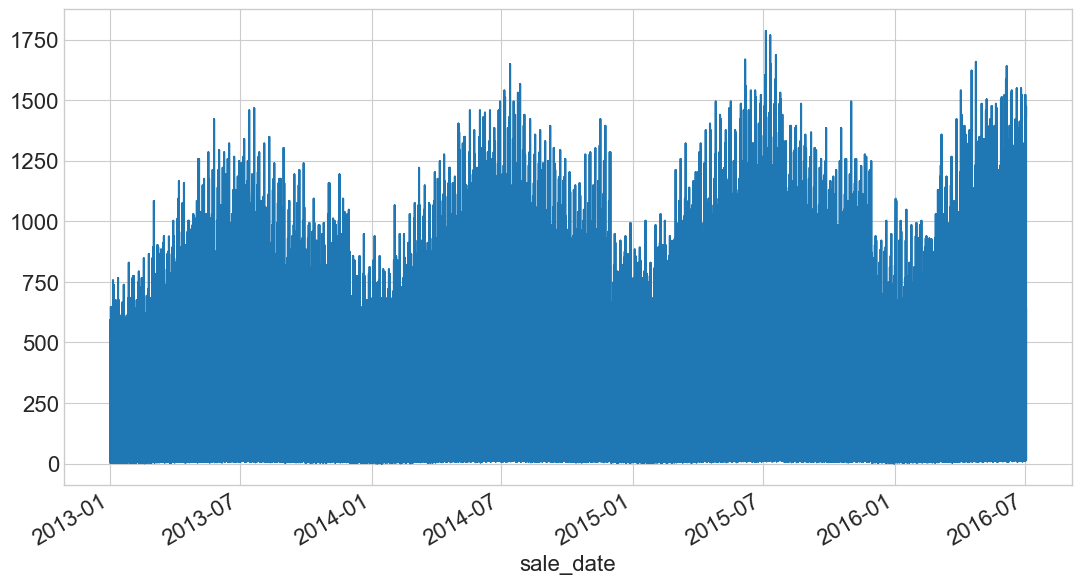

In [49]:
# plottin
y.plot()

<AxesSubplot:title={'center':'6 Month Average'}, xlabel='sale_date'>

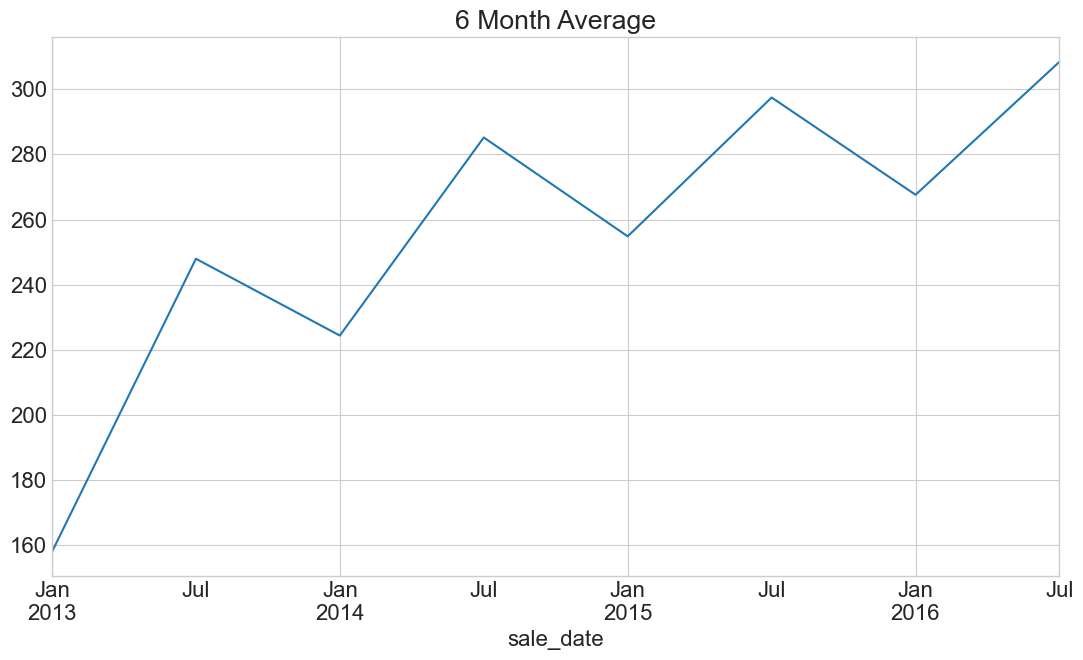

In [52]:
# plotting over a 6 month period
y.resample('6M').mean().plot(title='6 Month Average')

<AxesSubplot:title={'center':'2 Week Average'}, xlabel='sale_date'>

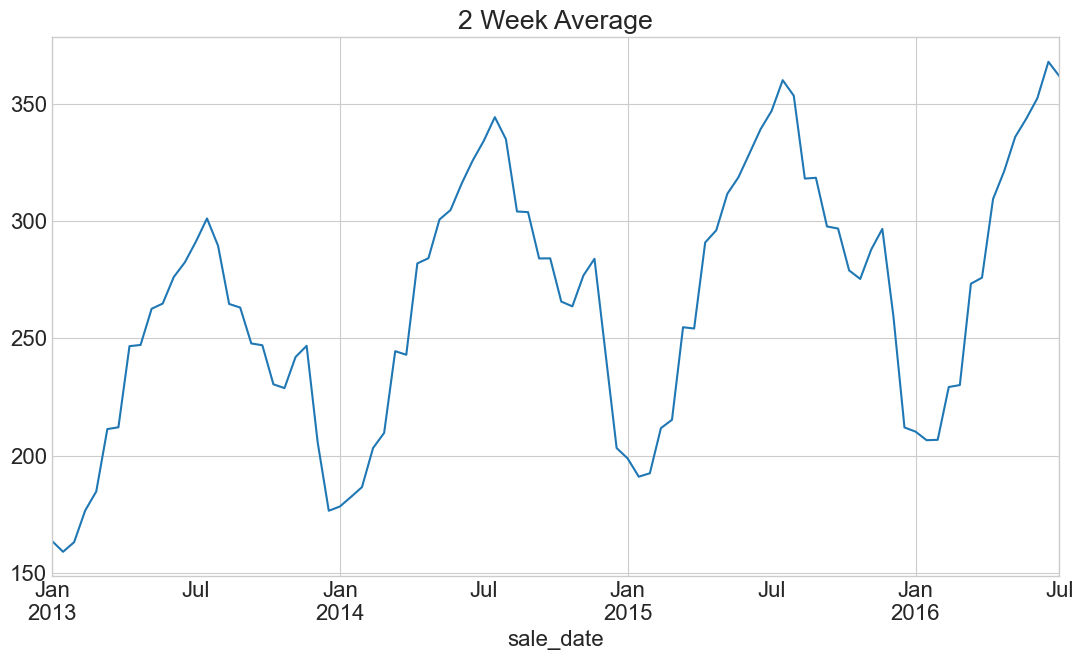

In [56]:
# 2 week periods
y.resample('2W').mean().plot(title='2 Week Average')

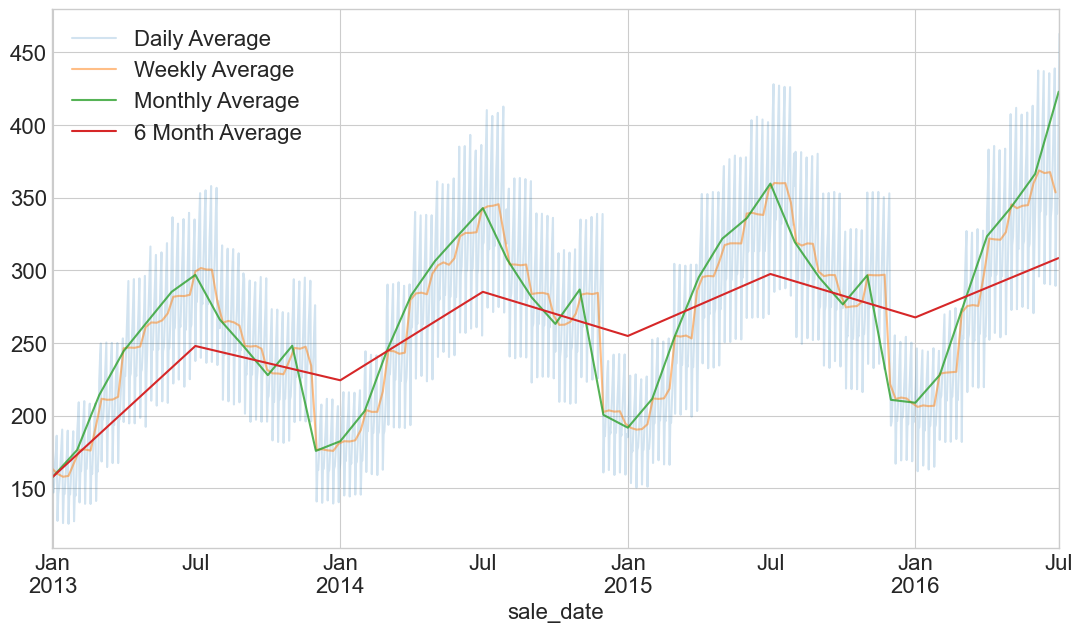

In [66]:
y.resample('D').mean().plot(alpha = .2, label='Daily Average')

y.resample('W').mean().plot(alpha = .5, label='Weekly Average')

y.resample('M').mean().plot(alpha = .8, label='Monthly Average')

y.resample('6M').mean().plot(label='6 Month Average')
plt.legend()

<AxesSubplot:xlabel='sale_date'>

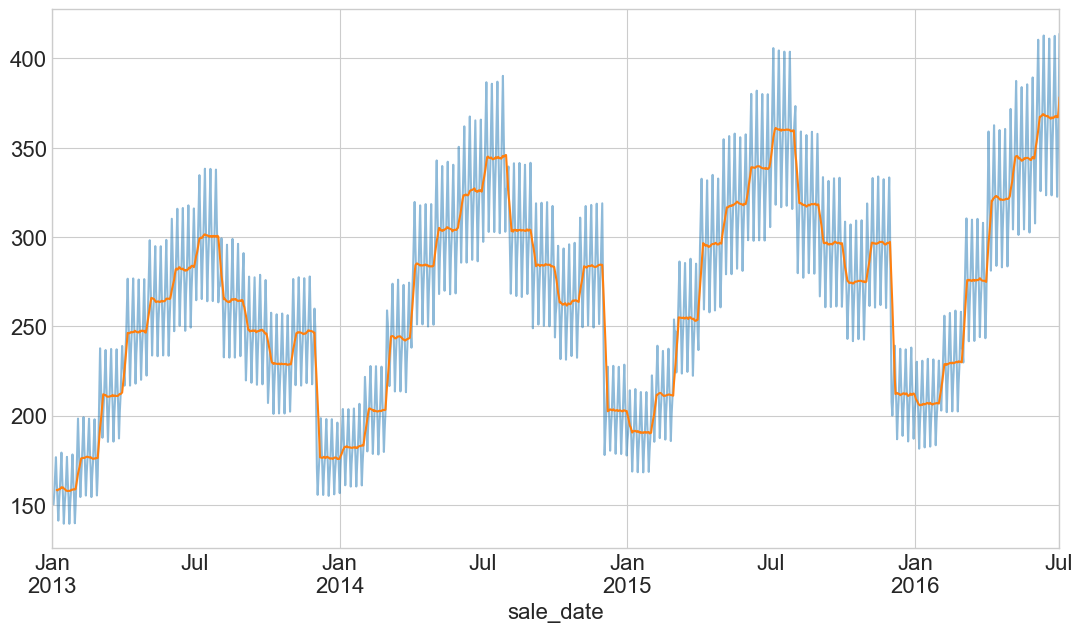

In [72]:
y.resample('D').mean().rolling(3).mean().plot(alpha=.5)
y.resample('D').mean().rolling(7).mean().plot()

<AxesSubplot:title={'center':'Average week-to-week change in sale totals'}, xlabel='sale_date'>

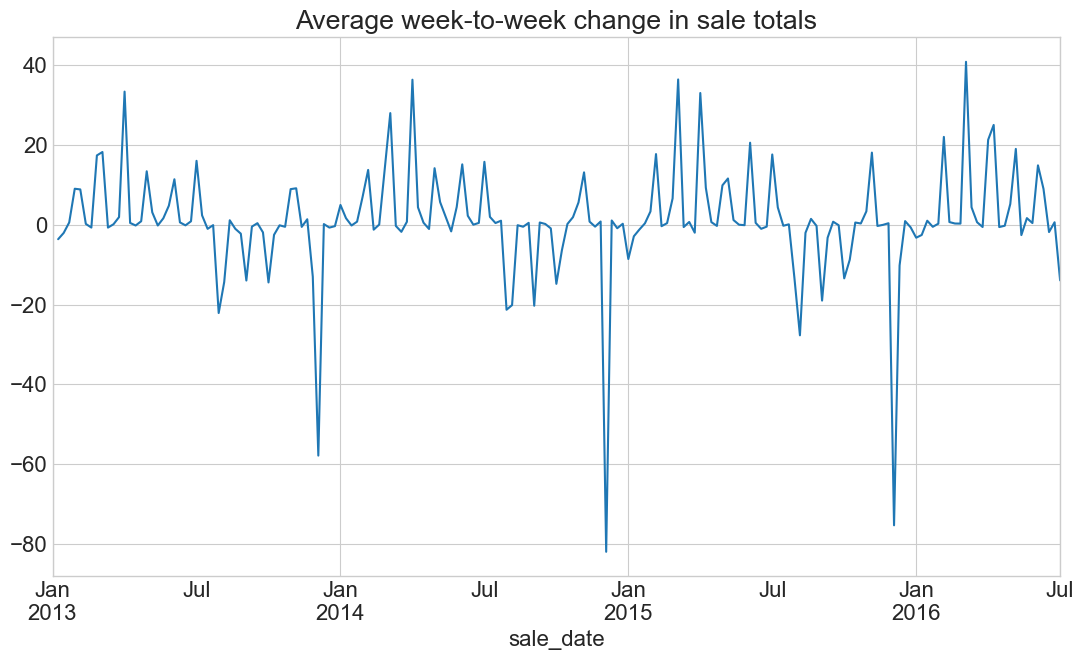

In [78]:
y.resample('W').mean().diff().plot(title='Average week-to-week change in sale totals')

<AxesSubplot:title={'center':'Average month-to-month change in sale totals'}, xlabel='sale_date'>

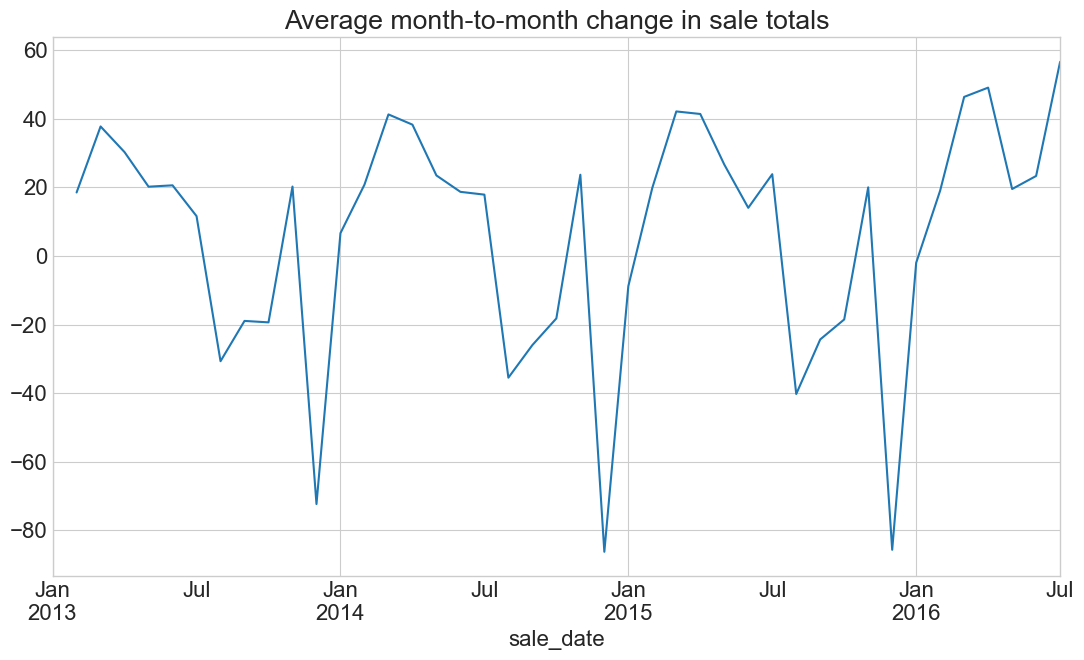

In [79]:
y.resample('M').mean().diff().plot(title='Average month-to-month change in sale totals')

#### Seasonal Plot

<AxesSubplot:title={'center':'Seasonal Plot'}, xlabel='sale_date'>

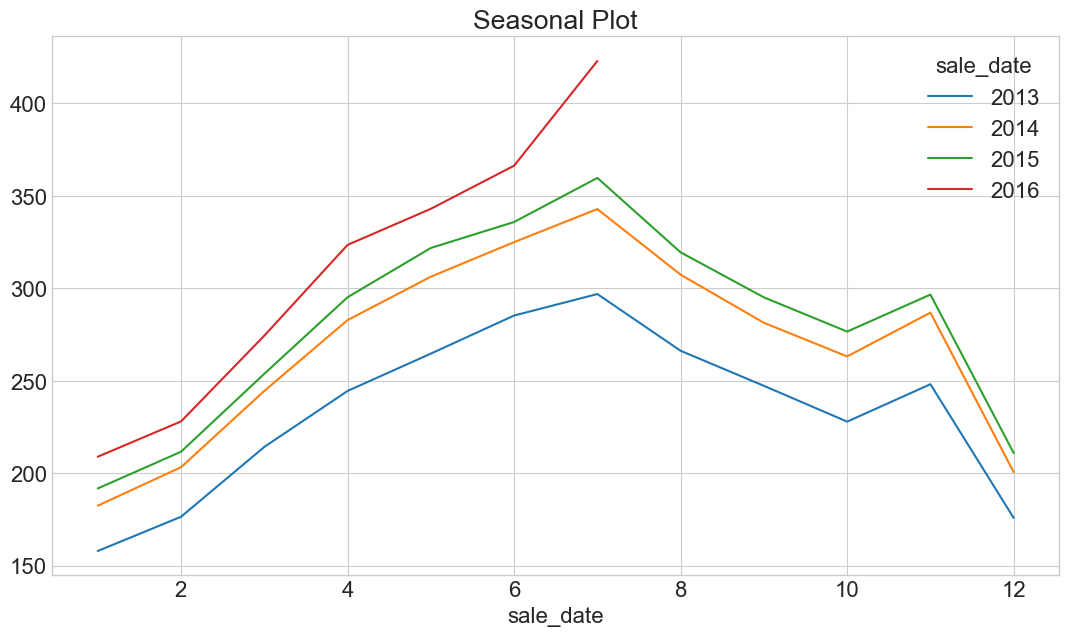

In [77]:
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Plot')

In [91]:
# creating a table with the average total sales per month per year
table = y.groupby([y.index.year, y.index.month]).mean().unstack()
table

sale_date,1,2,3,4,5,6,7,8,9,10,11,12
sale_date,,,,,,,,,,,,
2013,157.894723,176.411855,214.181650,244.460082,264.663123,285.261279,296.881241,266.183375,247.237694,227.868064,248.108656,175.753692
2014,182.410791,203.207122,244.488991,282.786091,306.267538,324.965376,342.849100,307.345466,281.350430,263.133772,286.821036,200.538977
2015,191.725206,211.589839,253.739390,295.147608,321.813672,335.850784,359.698008,319.435676,295.088416,276.572155,296.583045,210.886208
2016,208.900519,227.977512,274.367406,323.461873,342.986382,366.316222,422.947300,NaN,NaN,NaN,NaN,NaN


In [95]:
list(table.iteritems())[0]

(1,
 sale_date
 2013    157.894723
 2014    182.410791
 2015    191.725206
 2016    208.900519
 Name: 1, dtype: float64)

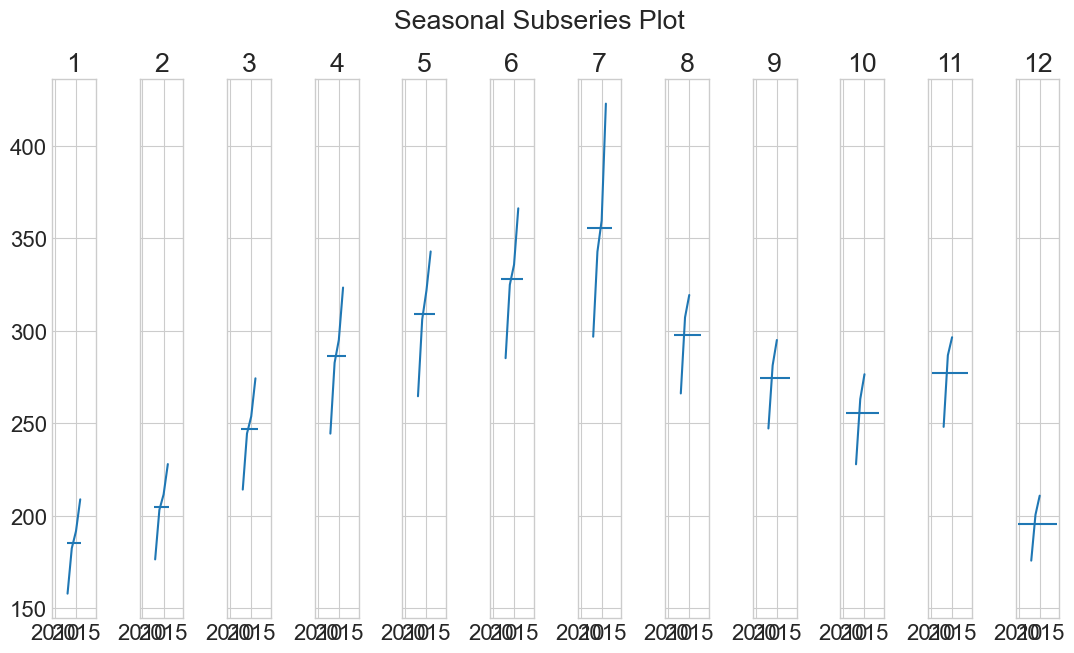

In [81]:
fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim())
    ax.set(xlabel='')

fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=1)

This plot shows a consistent increas in the total sales each year in each month

#### Lag Plot

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 50)'>

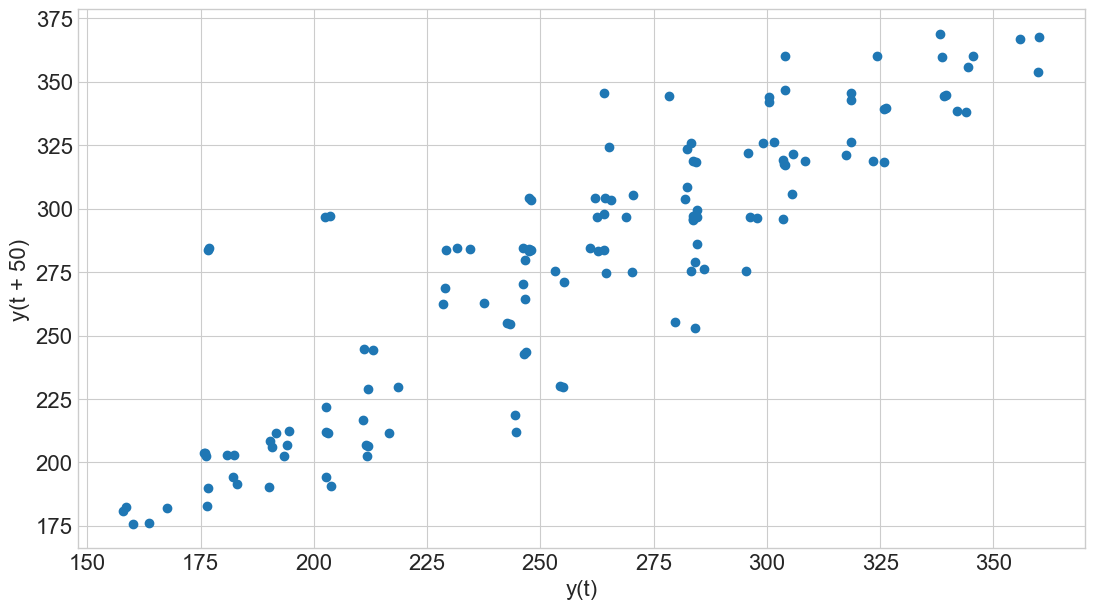

In [106]:
pd.plotting.lag_plot(train.sales_total.resample('W').mean(), lag=50)

#### Autocorrelation

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

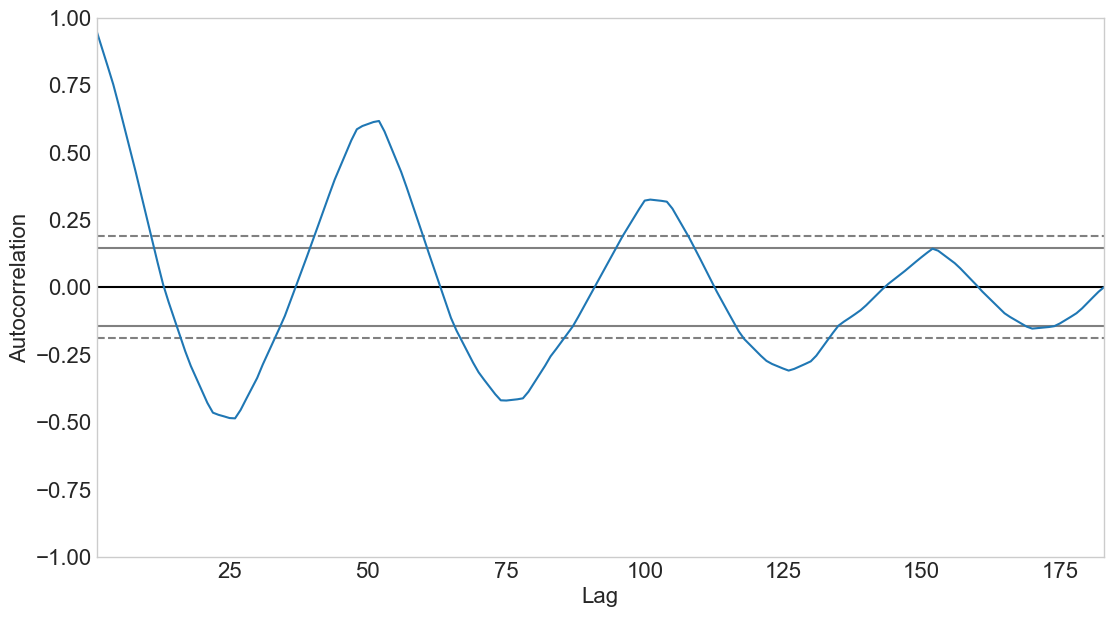

In [103]:
pd.plotting.autocorrelation_plot(train.sales_total.resample('W').mean())

#### Seasonal Decomposition